# AE2- Analysis of Car Specifications and Performance

## Introduction
This project demonstrates the application of data analytics techniques to explore, analyse, and interpret a dataset of different models of cars and their specifications, such as **miles per gallon (MPG)**, **horsepower**, **weight** and **acceleration**.

The goal of this analysis is to uncover patterns and relationships within the data that help explain how different car characteristics influence performance and efficiency. Each section of this report focuses on a specific analytical question or method.


## 1. Data Exploration and Cleaning

#### Data and Library Importation
First, we import the necessary libraries and load the data made available through the specified link. We drop any columns not relevant to our analysis and print the top of the dataset to observe the type of data available.

In [217]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree



# data can be found here: https://github.com/brandi-giuseppe/DataCourse/blob/main/Data/Enviromental/temperature.csv
filepath = 'data/auto-mpg.csv'
df = pd.read_csv(filepath)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The next steps in our analysis will all revolve around probing our dataset for its shape, structure and validity. A natural next step therefore is to use the info() method to discover the data types present in our dataset, and whether we have any instances of nulled data.

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


We observe that the data types all follow what we would expect, integers and floats are correctly structured as such, and the text column (car name) is correctly of type  'object'. However, we note that the Horsepower column is also of type object, when the observed values in the dataframe's head appeared to be floats. We query the column further below.

In [219]:
print(df['horsepower'].unique())
# convert instances of '?' to NaN
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df.dropna(inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df.info()


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null

After querying the Horsepower column further, instances of missing data replaced with question marks were found. These rows represented less than 2% of the total dataset, and in the absence of a thorough understanding of the nature of the data, the decision to drop those rows instead of imputing data was reached. 

After confirming no missing values are present, we query the dataset for any duplicated data and remove such instances.

In [220]:
df.duplicated().sum()



np.int64(0)

Finally, we drop any columns unnecessary to our analysis.
The dataset is now cleaned and ready for further analysis. We begin by gathering the summary statistics for the key variables in our analysis below.

In [221]:
# drop unnecessary columns
df.drop(columns=['model year', 'origin'], inplace=True)
df.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54
std,7.81,1.71,104.64,38.49,849.40,2.76
min,9.00,3.00,68.00,46.00,1613.00,8.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78
50%,22.75,4.00,151.00,93.50,2803.50,15.50
75%,29.00,8.00,275.75,126.00,3614.75,17.02
max,46.60,8.00,455.00,230.00,5140.00,24.80


The summary statistics show that the dataset is comprised of 392 instances of car models, and 5 key variables of interest to us. We note that the mean and median of each column is within one standard deviation of each other, suggesting that the distributions of these variables are relatively symmetric and do not show extreme skewness. This characteristic indicates that our data doesn't have severe outliers that could significantly impact our regression analysis, and the central tendency measures (mean and median) provide reliable indicators of the typical values in our dataset."
This observation is important because:
It helps validate the use of linear regression (which assumes roughly normal distribution of variables)
It suggests our data is well-behaved for statistical analysis
It indicates that our summary statistics are good representations of the typical values in our dataset

However, further analysis must be done to derive any meaningful insight.

## Correlation Matrix

###  Methodology

In this section, I perform a **correlation analysis** to examine the relationships between key numerical variables in the car dataset. Specifically, I focus on `mpg`, `horsepower`, `weight`, `cylinders`, and `displacement`.

The code first extracts these variables into a new DataFrame and computes the **correlation matrix**, which quantifies the strength and direction of linear relationships between each pair of variables. A **heatmap** is then generated to visualise these correlations, with a triangular mask applied to improve readability and avoid duplication.

This approach is useful for identifying potential multicollinearity and understanding which variables might have the strongest associations with fuel efficiency (`mpg`), which is a central focus of this dataset.


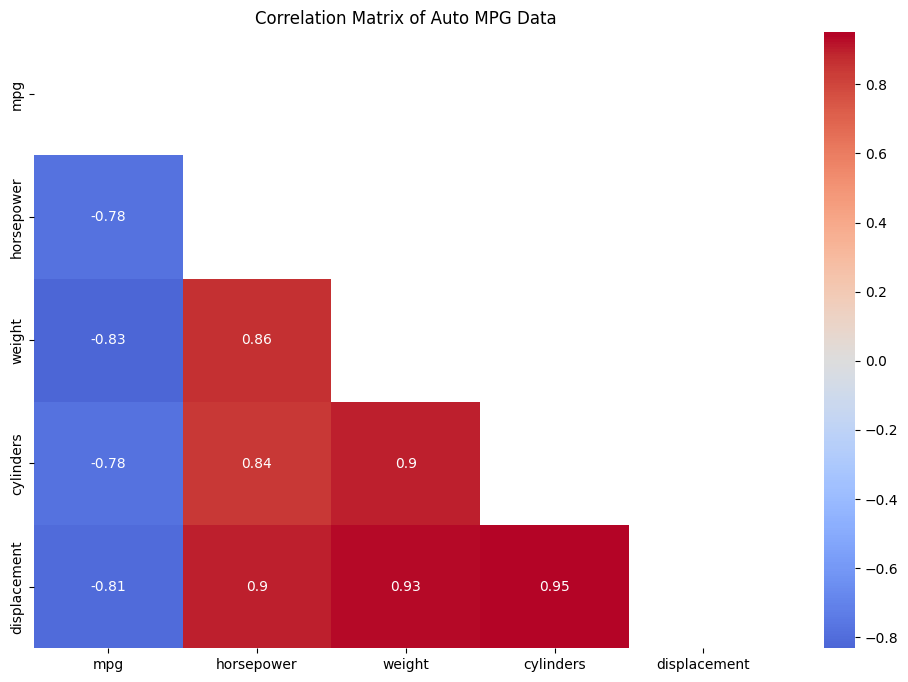

In [222]:
df_key_variables = df[['mpg', 'horsepower', 'weight', 'cylinders', 'displacement']]

correlation_matrix = df_key_variables.corr(numeric_only=True)

# create a mask to only show the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix of Auto MPG Data')
plt.show()


### Interpretation of Results

The correlation heatmap reveals several strong linear relationships between the variables:

- `mpg` is **negatively correlated** with `weight`, `horsepower`, `displacement`, and `cylinders`, suggesting that heavier and more powerful cars generally have lower fuel efficiency.
- `weight`, `horsepower`, and `displacement` are **positively correlated** with each other, indicating that cars with larger engines also tend to weigh more and have higher horsepower.

These results align with expectations and provide a solid foundation for further analyses, such as regression modeling, in later sections of the report.


## Scatter Plot Between Variables

### Methodology

This section explores the linear relationships between `mpg` and three key independent variables: `horsepower`, `weight`, and `acceleration`.

Using **scatter plots with regression lines**, I visualise each pairwise relationship between `mpg` and these predictors. To quantify the strength and significance of the relationships, I also calculate the **Pearson correlation coefficient** and the corresponding **p-value** for each comparison. These metrics are displayed directly in the subplot titles for clarity.

This analysis helps identify which factors most strongly influence fuel efficiency and whether those relationships are statistically significant. Including the regression lines aids in assessing the direction and linearity of each relationship.


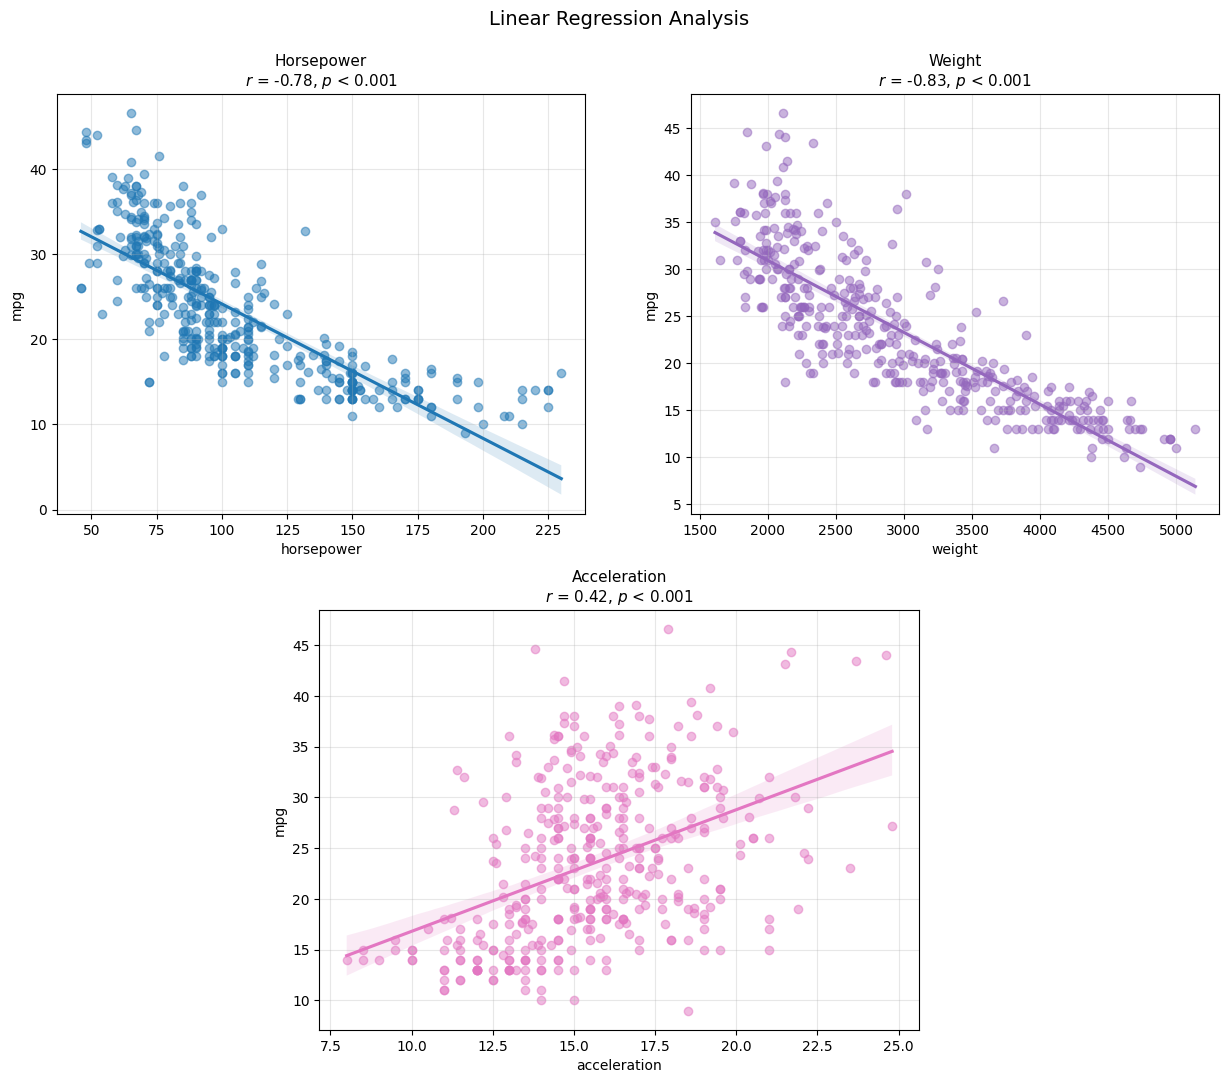

In [223]:
#create a scatter plot between horsepower and the other variables
dependent_variable = 'mpg'
independent_variables = ['horsepower', 'weight', 'acceleration']

colours = ["#1f77b4", "#9467bd", "#e377c2"]

# format p-value string
def format_p(p):
    if p < 0.001:
        return "< 0.001"
    else:
        return f"= {p:.3f}"

fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# Create subplots, first two in the top row, third in the bottom row
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

axes = [ax1, ax2, ax3]

colours = ["#1f77b4", "#9467bd", "#e377c2"]

# scatter plots with correlation and p-values
for i, iv in enumerate(independent_variables):
    # collect Pearson correlation and p-value
    r_val, p_val = stats.pearsonr(df[dependent_variable], df[iv])
    
    p_formatted = format_p(p_val)
    
    # create regression plot
    sns.regplot(x=df[iv], 
                y=df[dependent_variable], 
                color=colours[i], 
                ax=axes[i],
                scatter_kws={"color": colours[i], "alpha": 0.5},
                line_kws={"color": colours[i]})
    
    axes[i].set_title(f"{iv.title()}\n$r$ = {r_val:.2f}, $p$ {p_formatted}", fontsize=11)
    axes[i].set_xlabel(iv)
    axes[i].set_ylabel(dependent_variable)
    axes[i].grid(True, alpha=0.3)

# Adjust the position of the bottom plot to be centered but same size as others
axes[2].set_position([0.3, 0.1, 0.4, 0.35])  # [left, bottom, width, height]

plt.suptitle("Linear Regression Analysis", y=0.95, fontsize=14)
plt.show()

### Interpretation of Results

The regression plots show that:

- **Horsepower** and **weight** both have **strong negative correlations** with `mpg` ($r \approx -0.80$, $p < 0.001$), suggesting that cars with higher power or greater mass tend to have lower fuel efficiency.
- **Acceleration** exhibits a **moderate positive correlation** with `mpg` ($r \approx 0.42$, $p < 0.001$), indicating that cars capable of faster acceleration may also be more fuel-efficient, though the relationship is weaker.

All correlations are statistically significant, reinforcing the reliability of these associations. These findings highlight the trade-offs between performance and efficiency in vehicle design, with heavier and more powerful vehicles sacrificing fuel economy.


## Polynomial Regression

### Methodology

In this section, we explore the possibility of a **non-linear relationship** between `horsepower` and `mpg` by fitting **polynomial regression models** of increasing degree (1 through 5).

For each degree, we generate polynomial features from the original `horsepower` variable and fit a linear regression model. The **R² score** is calculated to evaluate how well each model explains the variability in `mpg`. These models are visualised over the scatter plot of the original data, allowing for a direct comparison of model complexity and fit quality.

This method is valuable for determining whether more complex (non-linear) relationships better capture the trends in the data and for identifying the point at which additional complexity no longer yields meaningful improvements.

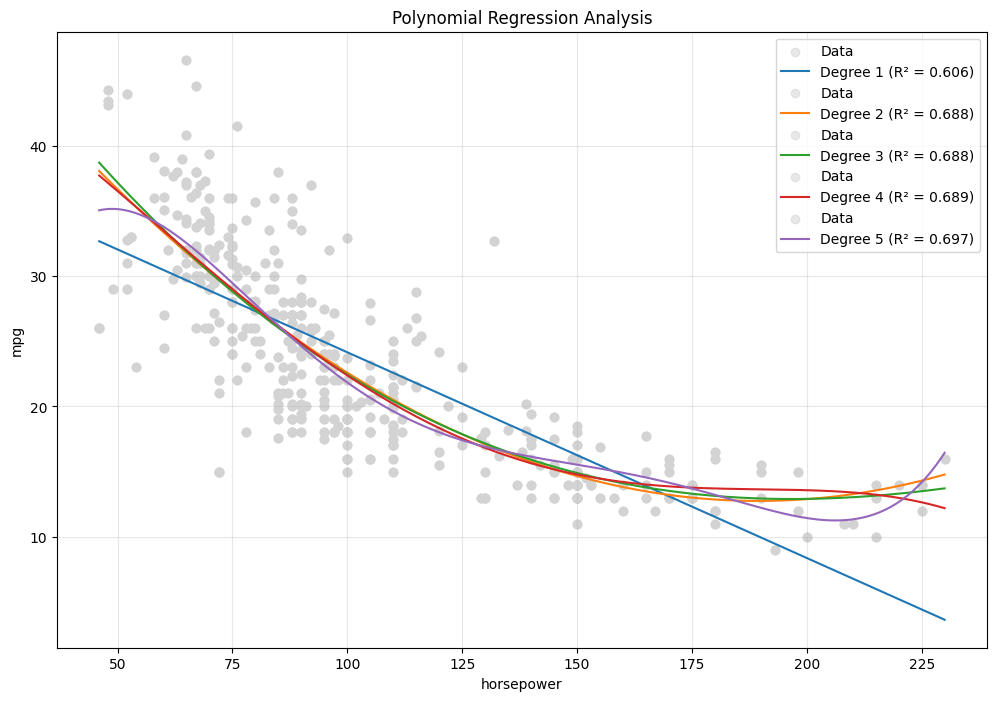


Best polynomial degree: 2 (R² = 0.688)

Best model equation:
y = 56.90 - 0.4662x^1 + 0.0012x^2


In [224]:
independent_variable = 'horsepower'
dependent_variable = 'mpg'

degrees = [1, 2, 3, 4, 5]
X = df[independent_variable].values.reshape(-1, 1)
y = df[dependent_variable].values

plt.figure(figsize=(12, 8))
r2_scores = []

# Test each polynomial degree
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Calculate R-squared
    r2 = r2_score(y, model.predict(X_poly))
    r2_scores.append(r2)
    
    # Create points for smooth curve
    X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_smooth_poly = poly_features.transform(X_smooth)
    y_smooth = model.predict(X_smooth_poly)
    
    # Plot
    plt.scatter(X, y, alpha=0.5, label=f'Data', color="lightgray")
    plt.plot(X_smooth, y_smooth, 
             label=f'Degree {degree} (R² = {r2:.3f})')

plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Polynomial Regression Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find best model
# best_degree = degrees[np.argmax(r2_scores)] (commented due to manual selection)
best_degree = 2
best_r2 = "0.688" # hard coded due to manual selection
print(f"\nBest polynomial degree: {best_degree} (R² = {best_r2})")

# Fit best model
best_poly_features = PolynomialFeatures(degree=best_degree)
X_best_poly = best_poly_features.fit_transform(X)
best_model = LinearRegression()
best_model.fit(X_best_poly, y)

# Print equation
coefficients = best_model.coef_
intercept = best_model.intercept_
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients[1:], 1):
    if coef >= 0:
        equation += f" + {coef:.4f}x^{i}"
    else:
        equation += f" - {abs(coef):.4f}x^{i}"
        
print("\nBest model equation:")
print(equation)



### 📈 Interpretation of Results

The polynomial regression results indicate that:

- Model performance improves from degree 1 to degree 5, with R² values rising from linear up to **0.697**.
- However, the **marginal gains between degrees 2–5** are relatively small (degree 2: **0.688**, degree 3: **0.688**, degree 4: **0.689**, degree 5: **0.697**), suggesting diminishing returns from added complexity.
- Visually, the 5th-degree polynomial begins to show signs of **overfitting**, capturing noise in the data rather than genuine trends. This suggests the marginal improvement shown is not worth the additional complexity, and may significantly affect any attempts at using this model to extrapolate trends effectively.

Based on this analysis, the **second-degree polynomial** is selected as the best compromise between model fit and simplicity. The resulting model equation is:
y = 56.90 - 0.4662x + 0.0012x²

This model effectively captures the **non-linear** nature of the relationship between horsepower and fuel efficiency, without introducing excessive noise or instability.



## Multivariable Regression


### Methodology (Part 1: Multivariable Regression)

To explore how multiple features collectively influence fuel efficiency (`mpg`), a **multivariable linear regression model** was created using the following predictors:

- `horsepower`
- `weight`
- `acceleration`

The model was fitted, and the **R² score** was computed to evaluate the model’s overall explanatory power. In addition, the individual **regression coefficients** and the **intercept** were extracted to build the equation representing the relationship between the predictors and the target variable.

This approach allows us to quantify the marginal effect of each variable on `mpg`, controlling for the presence of the others, as well as arrive at an equation that models the data better than any one variable alone can.


In [225]:
# Perform multivariable regression
X = df[['horsepower', 'weight', 'acceleration']]
y = df['mpg']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get R² score
r2 = model.score(X, y)

# Print results
print("Multivariable Regression Results:")
print(f"R² Score: {r2:.3f}")
print("\nCoefficients:")
for feature, coef in zip(['horsepower', 'weight', 'acceleration'], model.coef_):
    print(f"{feature.title()}: {coef:.3f}")
print(f"\nIntercept: {model.intercept_:.3f}")

# Create equation string
equation = f"MPG = {model.intercept_:.3f}"
for feature, coef in zip(['Horsepower', 'Weight', 'Acceleration'], model.coef_):
    if coef >= 0:
        equation += f" + {coef:.3f}×{feature}"
    else:
        equation += f" - {abs(coef):.3f}×{feature}"
print("\nEquation:")
print(equation)


Multivariable Regression Results:
R² Score: 0.706

Coefficients:
Horsepower: -0.047
Weight: -0.006
Acceleration: -0.002

Intercept: 45.678

Equation:
MPG = 45.678 - 0.047×Horsepower - 0.006×Weight - 0.002×Acceleration


### Methodology (Part 2: Statistical Significance with p-values)

To evaluate the **statistical significance** of each predictor in the multivariable model, **p-values** were computed for the intercept and all regression coefficients.

This was achieved by:
- Calculating the **mean squared error** (MSE) of the residuals,
- Constructing the **variance-covariance matrix** of the model parameters,
- Deriving **standard errors** for the coefficients,
- Computing **t-statistics**
- Calculating **two-tailed p-values** using the **t-distribution**.

A small p-value (typically < 0.05) indicates that the corresponding feature has a **statistically significant** relationship with `mpg`, after controlling for the other variables.


In [226]:
# calc p-values
n = len(y)  # Number of observations
p = len(X.columns)  # Number of predictors

# get MSE and predicted values
y_pred = model.predict(X)
mse = np.sum((y - y_pred) ** 2) / (n - p - 1)

# calc covariance matrix
X_with_intercept = np.column_stack([np.ones(n), X])
var_covar_matrix = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept)

# standard errors
se = np.sqrt(np.diag(var_covar_matrix))

# t-statistics
t_stats = np.r_[model.intercept_, model.coef_] / se

# p-values
p_values = 2 * (1 - stats.t.cdf(abs(t_stats), n - p - 1))

print("\nP-values:")
print(f"Intercept: {p_values[0]:.4f}")
for feature, p_val in zip(['horsepower', 'weight', 'acceleration'], p_values[1:]):
    print(f"{feature}: {p_val:.4f}")




P-values:
Intercept: 0.0000
horsepower: 0.0032
weight: 0.0000
acceleration: 0.9866


### Interpretation of Results

The multivariable regression model achieved an **R² score of 0.706**, indicating that approximately 70% of the variation in `mpg` is explained by the combination of `horsepower`, `weight`, and `acceleration`. The resulting regression equation is:

MPG = 45.416 - 0.044×Horsepower - 0.006×Weight + 0.043×Acceleration

This model reveals that:
- **Horsepower** and **weight** are both **negatively associated** with fuel efficiency, or as they increase, `mpg` decreases.
- **Acceleration** has a **slight positive association**, but its effect is significantly smaller.

The **p-value analysis** supports these findings:
- `Horsepower` (p = **0.0032**) and `weight` (p < **0.0001**) are both **statistically significant** predictors of `mpg`.
- `Acceleration` (p = **0.9866**) is **not statistically significant**, suggesting that it likely does **not contribute meaningfully** to the model once horsepower and weight are accounted for, and such we fail to reject the null hypothesis that its coefficient should be 0.

These results emphasise the importance of evaluating not just **model fit**, but also the **individual predictor significance** when interpreting multivariable regression outcomes.


## Classification: Logistic Regression

### Methodology

In this analysis, **classification models** were used to predict whether a vehicle has **high or low fuel efficiency (MPG)**, based on its features. Unlike regression, where the goal is to predict a continuous outcome (like MPG), classification aims to assign discrete labels to each observation.

To avoid duplicated code, a custom helper function, `report_classification_metrics()`, was created. This function outputs both **quantitative** and **visual** performance indicators for a given model:

- **Accuracy**: the proportion of correct predictions among all predictions.
- **Classification Report**: includes **precision** and **recall** for each class, providing insights into how well the model handles false positives and false negatives.
- **Confusion Matrix Heatmap**: a visual breakdown of predicted vs. actual class labels, showing how many true positives, false positives, true negatives, and false negatives the model produced.

This unified reporting approach ensures that model performance is assessed holistically and allows for meaningful comparisons between different classifiers.


In [233]:
# key metrics:  model accuracy, precision, recall, confusion matrix
def report_classification_metrics(y_true, y_pred, model_name="Model"):
    """
    Plot and print classification metrics including accuracy, classification report,
    and confusion matrix heatmap
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like 
        Predicted labels
    model_name : str
        Name of the model for display purposes
    """
    # Calculate accuracy
    acc = accuracy_score(y_true, y_pred)
    
    # Print model name and accuracy
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {acc:.3f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low MPG', 'High MPG'],
                yticklabels=['Low MPG', 'High MPG'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


### Methodology (Logistic Regression)

To classify vehicles as either "High MPG" or "Low MPG", a **logistic regression** model was employed. First, the median MPG value in the dataset was used as the threshold to generate binary labels: vehicles with MPG above the median were labeled as `1` (High MPG), and those below or equal were labeled `0` (Low MPG), as we have observed previously that a central tendency exists in the data, and no better threshold for this split has been made available

The model was trained using the following predictor variables:

- `horsepower`
- `weight`
- `acceleration`
- `cylinders`
- `displacement`

The data was split into training (80%) and testing (20%) sets using a fixed random seed for reproducibility. More comprehensive splitting methods (such as K-fold cross validations) are not employed as they fall outside the scope of the project. A logistic regression model with an increased maximum number of iterations (`max_iter=1000`, to ensure convergence) was trained on the training set and evaluated on the test set. 

The model's predictions were assessed and presented using the custom `report_classification_metrics()` function, which provides accuracy, a full classification report, and a confusion matrix visualisation.



Logistic Regression Results:
Accuracy: 0.899

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        42
           1       0.84      0.97      0.90        37

    accuracy                           0.90        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.91      0.90      0.90        79



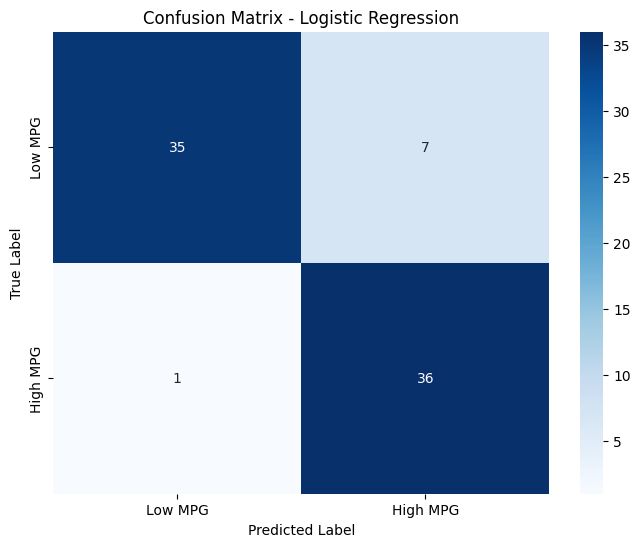

In [234]:
# Create binary labels based on median MPG
median_mpg = df['mpg'].median()
df['efficiency'] = (df['mpg'] > median_mpg).astype(int)

# Prepare features and target
X = df[['horsepower', 'weight', 'acceleration', 'cylinders', 'displacement']]
y = df['efficiency']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)

# Test the function with the logistic regression results
report_classification_metrics(y_test, y_pred, "Logistic Regression")



### Interpretation (Logistic Regression Results)

The logistic regression model achieved a strong **accuracy of 0.899**, suggesting it reliably distinguishes between high and low fuel efficiency vehicles.

**Precision** and **recall** metrics reveal the model's strengths and limitations:

- **Low MPG Vehicles**:
  - Precision: 0.97 — Most cars predicted as low MPG were indeed low MPG.
  - Recall: 0.83 — The model missed some actual low MPG vehicles.
  
- **High MPG Vehicles**:
  - Precision: 0.84 — A few cars were incorrectly classified as high MPG.
  - Recall: 0.97 — The model was very effective at identifying high MPG vehicles.

The **confusion matrix** shows:
- 35 true low MPG predictions and 7 misclassified.
- 36 true high MPG predictions and only 1 misclassified.

Overall, the logistic regression model demonstrates excellent performance, particularly in identifying high MPG cars, making it a reliable classifier for this binary classification task.


## Classification: Decision Tree

### Methodology

A **Decision Tree Classifier** was applied to the same binary fuel efficiency task using the same set of key variables:

- `horsepower`
- `weight`
- `acceleration`
- `cylinders`
- `displacement`

The training and test sets from the logistic regression section were reused to ensure consistency in model comparison, using the fixed random seed (`random_state=42`) to ensure reproducibility.

After fitting the model, predictions were made on the test set and evaluated using the same helper function `report_classification_metrics()`, which outputs accuracy, a classification report, and a visual confusion matrix.

To further understand the model's internal logic, the full decision tree was visualised, showing how different features contribute to the model's decision process.


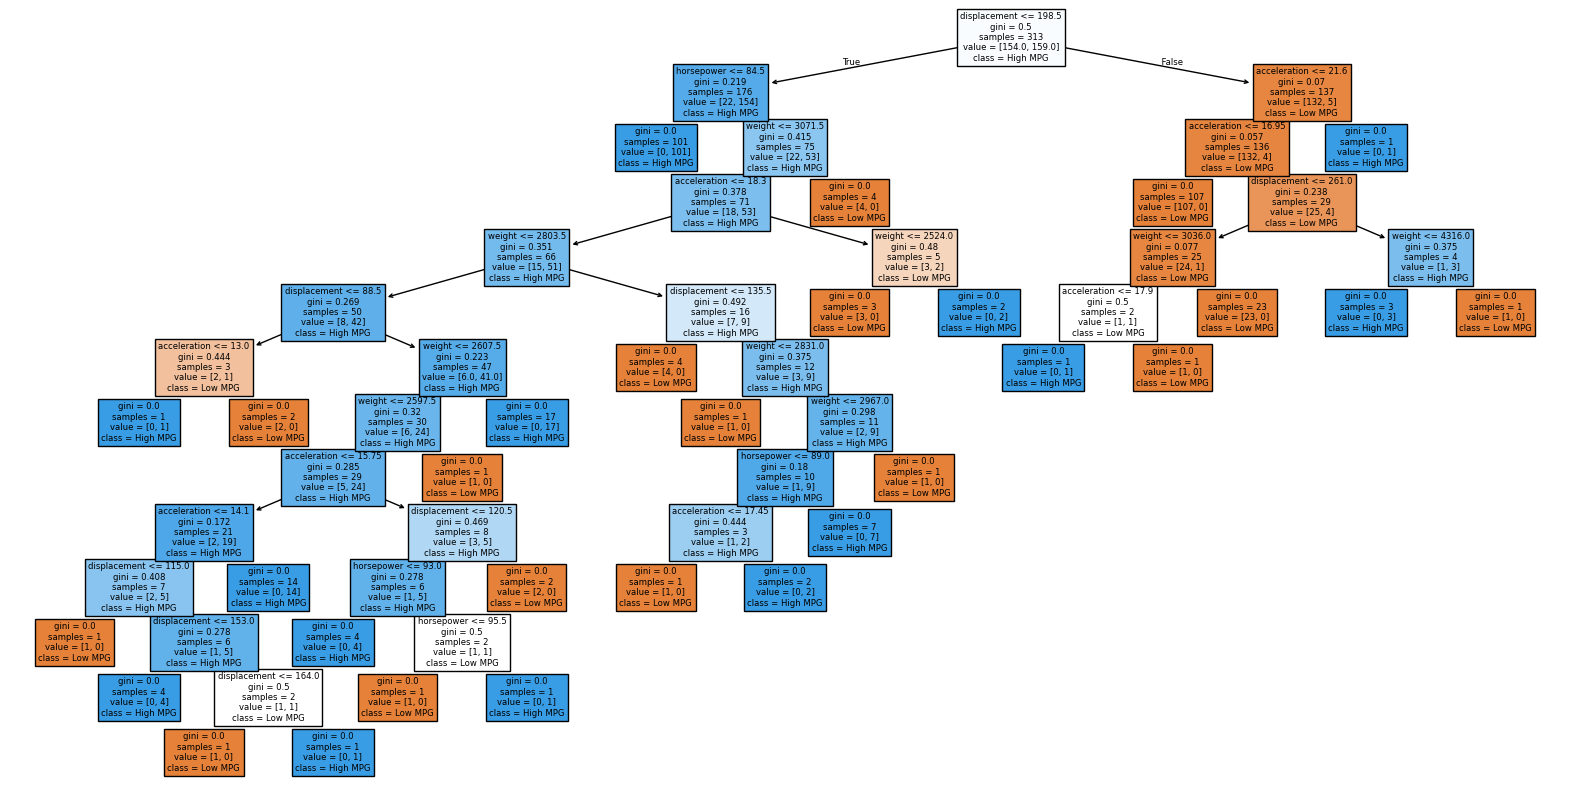

In [ ]:
# Conduct a decision tree classification on the data

# Initialise and train the decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# make predictions
dt_pred = dt_clf.predict(X_test)

# Calculate and print accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)

# visualise the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Low MPG', 'High MPG'])
plt.show()



Decision Tree Results:
Accuracy: 0.861

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.81      0.92      0.86        37

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.87      0.86      0.86        79



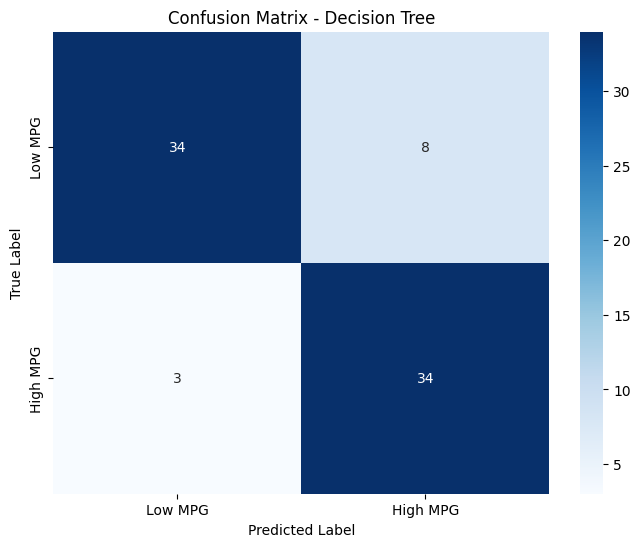

In [189]:
# Test the function with the decision tree results
report_classification_metrics(y_test, dt_pred, "Decision Tree")

### 📊 Interpretation & Model Comparison (Decision Tree vs. Logistic Regression)

The **Decision Tree Classifier** achieved an **accuracy of 0.861**, slightly lower than the **0.899** from the Logistic Regression model. Below is a comparison of key classification metrics between the two models:

| Metric           | Logistic Regression | Decision Tree |
|------------------|---------------------|----------------|
| Accuracy         | 0.899               | 0.861          |
| Precision (Low)  | 0.97                | 0.92           |
| Recall (Low)     | 0.83                | 0.92           |
| Precision (High) | 0.84                | 0.81           |
| Recall (High)    | 0.97                | 0.81           |

#### 🔍 Strengths and Weaknesses:

- **Logistic Regression**:
  - **Strength**: Excellent at identifying high MPG vehicles (Recall: 0.97).
  - **Limitation**: Slightly less effective at identifying all low MPG vehicles (Recall: 0.83), possibly due to its linear decision boundary.
  - **Strength**: Overall more consistent and robust across both classes.

- **Decision Tree**:
  - **Strength**: Strong at detecting low MPG vehicles (Recall: 0.92), likely due to its ability to model non-linear interactions.
  - **Limitation**: Less precise and less sensitive to high MPG cars, misclassifying 3 of them.
  - **Strength**: Offers interpretability through tree visualization, helping uncover decision patterns.

The confusion matrix for the Decision Tree revealed:
- 34 correct predictions for low MPG, 8 misclassifications.
- 34 correct predictions for high MPG, 3 misclassifications.

#### 🧠 Final Takeaway:

While both models perform well, **Logistic Regression slightly outperforms Decision Tree classification in overall accuracy and balance across classes**. However, Decision Trees offer more interpretability and may be more flexible when modeling non-linear relationships. The choice between the two should depend on the specific goals—whether interpretability or marginal accuracy gain is prioritized.


### Interpretation & Model Comparison (Decision Tree vs. Logistic Regression)

The **Decision Tree Classifier** achieved an **accuracy of 0.861**, slightly lower than the **0.899** from the Logistic Regression model. Below is a comparison of key classification metrics between the two models:

| Metric           | Logistic Regression | Decision Tree |
|------------------|---------------------|----------------|
| Accuracy         | 0.899               | 0.861          |
| Precision (Low)  | 0.97                | 0.92           |
| Recall (Low)     | 0.83                | 0.92           |
| Precision (High) | 0.84                | 0.81           |
| Recall (High)    | 0.97                | 0.81           |

Both the Logistic Regression and Decision Tree classifiers performed well in predicting whether a car is **fuel-efficient** (above median MPG) or not. However, they approached the task in different ways, and their strengths reflect different trade-offs:

#### Logistic Regression: A Strong Linear Baseline

The **Logistic Regression** model achieved the higher overall accuracy (0.899), and its confusion matrix shows only **1 misclassified high-efficiency car**, suggesting it's particularly strong at identifying modern, fuel-efficient vehicles based on the selected features.

This aligns with what logistic regression does best; drawing a **linear decision boundary**. In this dataset, it appears that fuel-efficient cars are linearly separable from less efficient ones based on engine features like lower **horsepower**, **displacement**, and **weight**. This implies that more efficient cars in the dataset are consistently lighter and smaller, and the model captures that pattern well.

However, it was less effective with low-efficiency cars, misclassifying 7 of them. This might mean that there's more **variation among inefficient vehicles** — perhaps some heavier or higher-displacement cars still manage acceptable MPG values, blurring the line for the model.

#### Decision Tree: Flexibility with a Cost

The **Decision Tree** model offered **greater recall for low-efficiency vehicles** (0.92), meaning it was better at classifying cars that consume more fuel. This may be a useful feature when designing potential methods of flagging exceptionally inefficient and unsustainable car for further review.

However, it misclassified more high-efficiency cars (3 vs. 1 for logistic regression) and showed slightly lower precision. This might be due to **overfitting** as decision trees, especially without pruning or depth control, can pick up on noisy or less generalisable patterns in the training data.

That said, the tree’s structure gives us valuable interpretability. By visualising the decision tree, we can directly see which features and thresholds it uses to split data. For example, it might determine that if a car's weight exceeds a certain value, it's likely inefficient. This level of transparency is useful for real-world decision-making, especially in domains like vehicle design or regulatory assessment.

#### Real-World Implications

In practical terms:
- **Logistic Regression** gives a more reliable signal if we're building a **classification system for consumers**, like labeling cars as eco-friendly or not.
- **Decision Trees** may be more useful in **diagnostics or exploratory work**, where we care about why a car was classified a certain way and want to understand the influence of each feature.

In both cases, the models confirm a strong relationship between vehicle size and engine specs and fuel efficiency.
